In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Simple Chart**

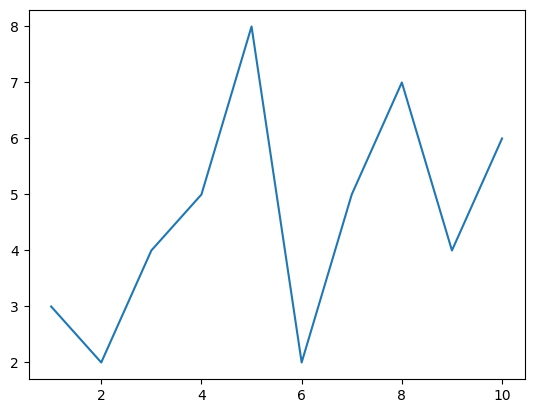

In [2]:
fig, ax = plt.subplots()  
ax.plot( [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6] )  

**Multi attribute trend in a Chart**

Text(0.5, 1.0, 'Sample Chart')

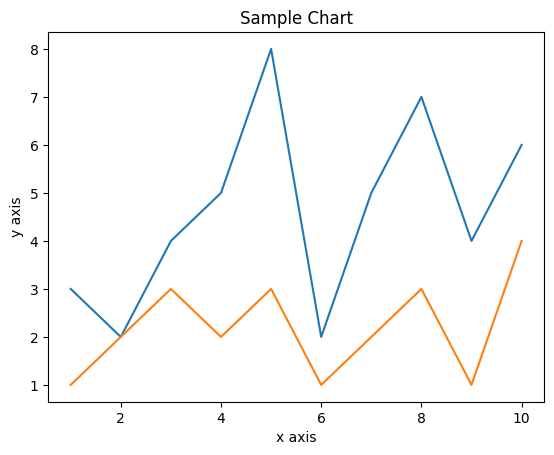

In [3]:
fig, ax = plt.subplots() 

ax.plot( [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6], label = "Data1")
ax.plot( [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 2, 3, 1, 2, 3, 1, 4], label = "Data2") 

ax.set_xlabel("x axis") 
ax.set_ylabel("y axis")
ax.set_title("Sample Chart")

**Reading a sample data**

In [4]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [6]:
df_groupby = df.groupby(["release_year", "type"], as_index= False).show_id.count()
df_groupby.columns = ["release_year", "type", "count"]
df_groupby.head()

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


In [7]:
df_pivot = df_groupby.pivot(index= "release_year", columns= "type", values= "count").reset_index()
df_pivot.fillna(0, inplace = True)
df_pivot.head()

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,0.0


**Trend Chart**

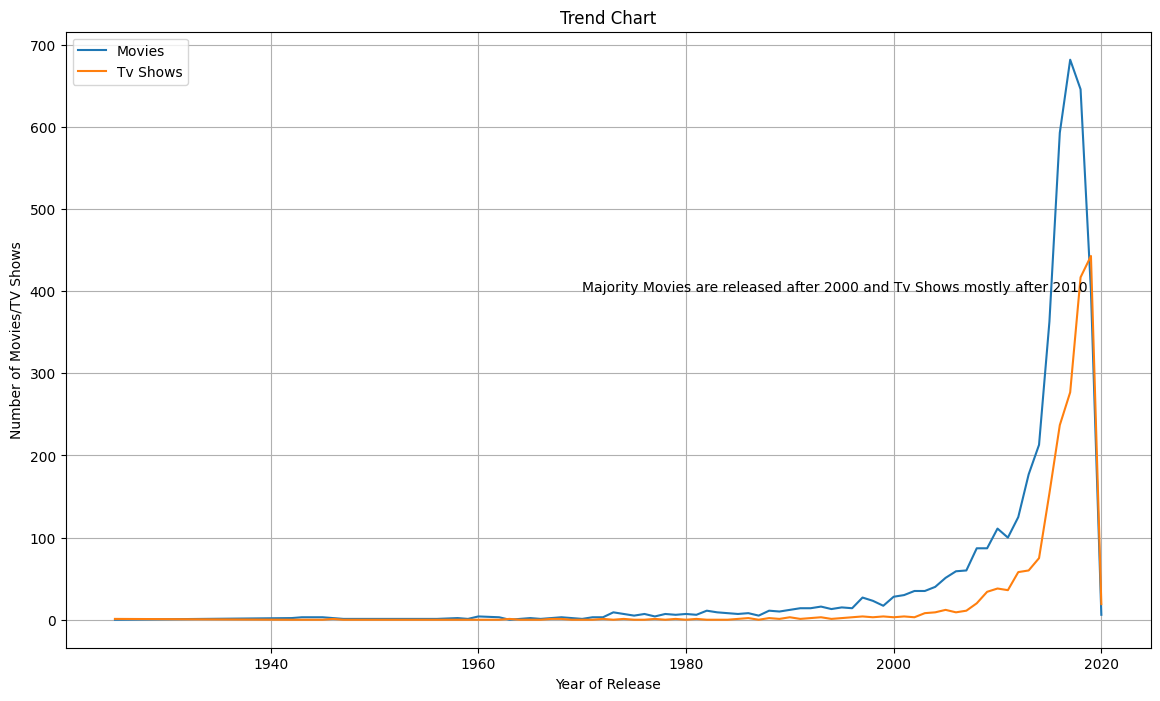

In [8]:
fig, ax = plt.subplots()  

ax.plot(df_pivot.release_year, df_pivot.Movie, label = "Movies")
ax.plot(df_pivot.release_year, df_pivot["TV Show"], label = "Tv Shows") 

ax.set_ylabel("Number of Movies/TV Shows") 
ax.set_xlabel("Year of Release")
ax.set_title("Trend Chart")

plt.text(x= 1970, y= 400, s= r"Majority Movies are released after 2000 and Tv Shows mostly after 2010")
fig.set_size_inches(14, 8)
plt.grid()
ax.legend()

**Scatter Plot**

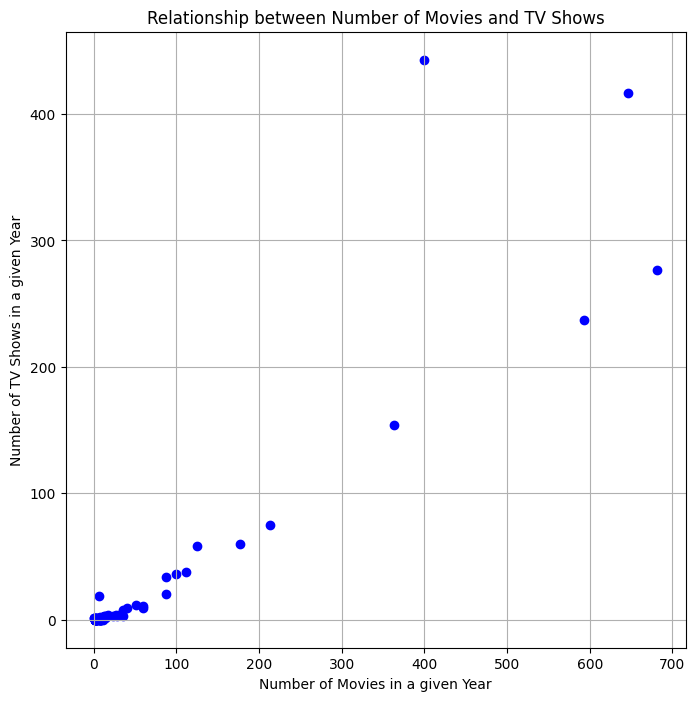

In [9]:
fig_1, ax_1 = plt.subplots()

plt.scatter(df_pivot["Movie"], df_pivot["TV Show"], color=  "b")

ax_1.set_xlabel("Number of Movies in a given Year") 
ax_1.set_ylabel("Number of TV Shows in a given Year")
ax_1.set_title("Relationship between Number of Movies and TV Shows")

fig_1.set_size_inches(8, 8)
plt.rcParams.update({"font.size": 10})
plt.grid()
plt.show()